In [444]:
!pip install folium
!pip install geocoder
print("ready")

ready


In [445]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import os
from sklearn.cluster import KMeans
import folium 
from geopy.geocoders import Nominatim 
import matplotlib.cm as cm
import matplotlib.colors as colors
import json
from pandas.io.json import json_normalize
import geocoder

print('Installation successful!')

Installation successful!


In [ ]:
#Fetching the data

In [447]:
List_url = "https://en.wikipedia.org/wiki/List_of_areas_of_London"
source = requests.get(List_url).text

In [448]:
soup = BeautifulSoup(source, 'xml')

In [449]:
table=soup.find('table', {'class':'wikitable sortable'})

In [450]:
column_names = [
'Location','Borough','Post town','Postcode district','Dial code','OS grid ref']
df = pd.DataFrame(columns = column_names)

In [451]:
for tr_cell in table.find_all('tr'):
    row_data=[]
    for td_cell in tr_cell.find_all('td'):
        row_data.append(td_cell.text.strip())
    if len(row_data)>0:
        df.loc[len(df)] = row_data

In [452]:
df.head()

,Location,Borough,Post town,Postcode district,Dial code,OS grid ref
0,Abbey Wood,"Bexley, Greenwich [7]",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham[8]",LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon[8],CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon[8],CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728


In [453]:
df.shape

(533, 6)

In [ ]:
#Cleaning the data

In [455]:
df["Borough"] = df["Borough"].map(lambda x: x.rstrip("]").rstrip("0123456789").rstrip("["))

In [456]:
df.head(10)

,Location,Borough,Post town,Postcode district,Dial code,OS grid ref
0,Abbey Wood,"Bexley, Greenwich",LONDON,SE2,020,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham",LONDON,"W3, W4",020,TQ205805
2,Addington,Croydon,CROYDON,CR0,020,TQ375645
3,Addiscombe,Croydon,CROYDON,CR0,020,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",020,TQ478728
5,Aldborough Hatch,Redbridge,ILFORD,IG2,020,TQ455895
6,Aldgate,City,LONDON,EC3,020,TQ334813
7,Aldwych,Westminster,LONDON,WC2,020,TQ307810
8,Alperton,Brent,WEMBLEY,HA0,020,TQ185835
9,Anerley,Bromley,LONDON,SE20,020,TQ345695


In [457]:
df= df.drop(['Dial code'], axis = 1)

In [458]:
df.head()

,Location,Borough,Post town,Postcode district,OS grid ref
0,Abbey Wood,"Bexley, Greenwich",LONDON,SE2,TQ465785
1,Acton,"Ealing, Hammersmith and Fulham",LONDON,"W3, W4",TQ205805
2,Addington,Croydon,CROYDON,CR0,TQ375645
3,Addiscombe,Croydon,CROYDON,CR0,TQ345665
4,Albany Park,Bexley,"BEXLEY, SIDCUP","DA5, DA14",TQ478728


In [459]:
#Removing other than Northwestern areas from the dataframe

In [460]:
df_new=df[df['Postcode district'].str.contains("NW")]

In [461]:
df_new.shape

(41, 5)

In [462]:
df_new.head(10)

,Location,Borough,Post town,Postcode district,OS grid ref
14,Arkley,Barnet,"BARNET, LONDON","EN5, NW7",TQ225955
24,Barnet Gate,Barnet,"LONDON, BARNET","NW7, EN5",TQ218952
39,Belsize Park,Camden,LONDON,NW3,TQ273845
60,Brent Cross,Barnet,LONDON,"NW2, NW4",TQ230874
61,Brent Park,Brent,LONDON,NW10,TQ209852
69,Brondesbury,Brent,LONDON,NW6,TQ245845
73,"Burroughs, The",Barnet,LONDON,NW4,TQ227891
76,Camden Town,Camden,LONDON,NW1,TQ295845
86,Chalk Farm,Camden,LONDON,NW1,TQ281844
94,Childs Hill,Barnet,LONDON,NW2,TQ245865


In [463]:
df_new = df_new.reset_index(drop=True)

In [464]:
df_new

,Location,Borough,Post town,Postcode district,OS grid ref
0,Arkley,Barnet,"BARNET, LONDON","EN5, NW7",TQ225955
1,Barnet Gate,Barnet,"LONDON, BARNET","NW7, EN5",TQ218952
2,Belsize Park,Camden,LONDON,NW3,TQ273845
3,Brent Cross,Barnet,LONDON,"NW2, NW4",TQ230874
4,Brent Park,Brent,LONDON,NW10,TQ209852
5,Brondesbury,Brent,LONDON,NW6,TQ245845
6,"Burroughs, The",Barnet,LONDON,NW4,TQ227891
7,Camden Town,Camden,LONDON,NW1,TQ295845
8,Chalk Farm,Camden,LONDON,NW1,TQ281844
9,Childs Hill,Barnet,LONDON,NW2,TQ245865


In [465]:
df_new.rename(columns={'Postcode district': 'Postcode','Location':'Neighborhood'}, inplace=True)

In [467]:
df_new.head()

,Neighborhood,Borough,Post town,Postcode,OS grid ref
0,Arkley,Barnet,"BARNET, LONDON","EN5, NW7",TQ225955
1,Barnet Gate,Barnet,"LONDON, BARNET","NW7, EN5",TQ218952
2,Belsize Park,Camden,LONDON,NW3,TQ273845
3,Brent Cross,Barnet,LONDON,"NW2, NW4",TQ230874
4,Brent Park,Brent,LONDON,NW10,TQ209852


In [468]:
#Printing OS grid ref -numbers to get the coordinates for each neighborhood
print ((df_new['OS grid ref']).to_string(index=False))

 TQ225955
 TQ218952
 TQ273845
 TQ230874
 TQ209852
 TQ245845
 TQ227891
 TQ295845
 TQ281844
 TQ245865
 TQ205785
 TQ213897
 TQ235855
 TQ225865
 TQ257853
 TQ248876
 TQ285855
 TQ217905
 TQ205918
 TQ265855
 TQ215835
 TQ229887
 TQ215888
 TQ235825
 TQ285845
 TQ245835
 TQ195885
 TQ275825
 TQ225925
 TQ215855
 TQ216823
 TQ195828
 TQ282838
 TQ246832
 TQ295825
 TQ265835
 TQ203839
 TQ266842
 TQ255855
 TQ215885
 TQ227846


In [469]:
# The code was removed by Watson Studio for sharing.

,OS grid ref,Latitude,Longitude
0,TQ225955,51.644964,-0.230957
1,TQ218952,51.642420,-0.241173
2,TQ273845,51.545046,-0.165609
3,TQ230874,51.572061,-0.226573
4,TQ209852,51.552743,-0.257616


In [470]:
df_coord = df_data_1

In [471]:
df_coord.shape

(41, 3)

In [472]:
#Merging the 2 dataframes together
df_abc = pd.merge(df_new, df_coord, on='OS grid ref')

In [473]:
df_abc.head()

,Neighborhood,Borough,Post town,Postcode,OS grid ref,Latitude,Longitude
0,Arkley,Barnet,"BARNET, LONDON","EN5, NW7",TQ225955,51.644964,-0.230957
1,Barnet Gate,Barnet,"LONDON, BARNET","NW7, EN5",TQ218952,51.642420,-0.241173
2,Belsize Park,Camden,LONDON,NW3,TQ273845,51.545046,-0.165609
3,Brent Cross,Barnet,LONDON,"NW2, NW4",TQ230874,51.572061,-0.226573
4,Brent Park,Brent,LONDON,NW10,TQ209852,51.552743,-0.257616


In [474]:
CLIENT_ID = 'AR0VRTCKVV0GASVOL2E4HG3NNTLMX4AUESPJMVRM30COZCH5'
CLIENT_SECRET = 'JSOLGBBVU3O2AGEVAILHZMVY3HXPCUFXCCJUPBZYBVXHZFWO'
VERSION = '20180605'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: AR0VRTCKVV0GASVOL2E4HG3NNTLMX4AUESPJMVRM30COZCH5
CLIENT_SECRET:JSOLGBBVU3O2AGEVAILHZMVY3HXPCUFXCCJUPBZYBVXHZFWO


In [475]:
address = 'London'

geolocator = Nominatim(user_agent="lon_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


In [476]:
#Creating a map of London with the NW-neighborhoods we're interested in
map_london = folium.Map(location=[latitude, longitude], zoom_start=10)

for lat, lng, borough, location in zip(df_abc['Latitude'], df_abc['Longitude'], df_abc['Borough'], df_abc['Neighborhood']):
    label = '{}, {}'.format(location, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

In [478]:
#Let's explore the different neighborhoods

In [479]:
#First neighborhood from the list
df_abc.loc[0, 'Neighborhood']

'Arkley'

In [480]:
neighborhood_latitude = df_abc.loc[0, 'Latitude']
neighborhood_longitude = df_abc.loc[0, 'Longitude']

neighborhood_name = df_abc.loc[0, 'Neighborhood']
print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Arkley are 51.644964, -0.23095694.


In [548]:
#Let's explore Arkley
limit = 100

radius = 500


url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    limit)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=AR0VRTCKVV0GASVOL2E4HG3NNTLMX4AUESPJMVRM30COZCH5&client_secret=JSOLGBBVU3O2AGEVAILHZMVY3HXPCUFXCCJUPBZYBVXHZFWO&v=20180605&ll=51.644964,-0.23095694&radius=500&limit=100'

In [550]:
results = requests.get(url).json()

In [551]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [552]:
#Venues within 500 meters from Arkley
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues)

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Cottage Garden Nursery,Flower Shop,51.645982,-0.234079
1,Arkley Golf Club,Golf Course,51.647774,-0.233413


In [486]:
#Now lets examine venues in all of the neighborhoods
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [487]:
lon_venues = getNearbyVenues(names=df_abc['Neighborhood'],
                                   latitudes=df_abc['Latitude'],
                                   longitudes=df_abc['Longitude']
                                  )

Arkley
Barnet Gate
Belsize Park
Brent Cross
Brent Park
Brondesbury
Burroughs, The
Camden Town
Chalk Farm
Childs Hill
Church End
Colindale
Cricklewood
Dollis Hill
Frognal
Golders Green
Gospel Oak
Grahame Park
The Hale
Hampstead
Harlesden
Hendon
The Hyde
Kensal Green
Kentish Town
Kilburn
Kingsbury
Lisson Grove
Mill Hill
Neasden
Old Oak Common
Park Royal
Primrose Hill
Queen's Park
Somerstown
St John's Wood
Stonebridge
Swiss Cottage
West Hampstead
West Hendon
Willesden


In [488]:
print(lon_venues.shape)
lon_venues.head()

(919, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Arkley,51.644964,-0.230957,Cottage Garden Nursery,51.645982,-0.234079,Flower Shop
1,Arkley,51.644964,-0.230957,Arkley Golf Club,51.647774,-0.233413,Golf Course
2,Barnet Gate,51.642420,-0.241173,The Gate,51.641994,-0.242582,Pub
3,Barnet Gate,51.642420,-0.241173,Barnet Gate Wood,51.639062,-0.242836,Forest
4,Belsize Park,51.545046,-0.165609,Chamomile,51.545729,-0.162398,Café


In [490]:
#Let's see how many venues there are per neighborhood
lon_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Arkley,2,2,2,2,2,2
Barnet Gate,2,2,2,2,2,2
Belsize Park,24,24,24,24,24,24
Brent Cross,21,21,21,21,21,21
Brent Park,7,7,7,7,7,7
Brondesbury,23,23,23,23,23,23
"Burroughs, The",15,15,15,15,15,15
Camden Town,20,20,20,20,20,20
Chalk Farm,78,78,78,78,78,78


In [491]:
print('There are {} uniques categories.'.format(len(lon_venues['Venue Category'].unique())))

There are 189 uniques categories.


In [492]:
#one_hot_encoding
lon_onehot = pd.get_dummies(lon_venues[['Venue Category']], prefix="", prefix_sep="")

lon_onehot['Neighborhood'] = lon_venues['Neighborhood'] 

fixed_columns = [lon_onehot.columns[-1]] + list(lon_onehot.columns[:-1])
lon_onehot = lon_onehot[fixed_columns]

lon_onehot.head()

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Aquarium,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Arts & Entertainment,...,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Yoga Studio,Zoo,Zoo Exhibit
0,Arkley,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Arkley,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Barnet Gate,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Barnet Gate,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Belsize Park,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [493]:
lon_onehot.shape

(919, 190)

In [326]:
#Let's group the neighbourhoods
lon_grouped = lon_onehot.groupby('Neighborhood').mean().reset_index()

In [494]:
#Let's select 5 top venues on each neighbrhood
num_top_venues = 5

for hood in lon_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = lon_grouped[lon_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Arkley----
                        venue  freq
0                 Flower Shop   0.5
1                 Golf Course   0.5
2           Afghan Restaurant   0.0
3  Modern European Restaurant   0.0
4               Movie Theater   0.0


----Barnet Gate----
                 venue  freq
0               Forest   0.5
1                  Pub   0.5
2      Organic Grocery   0.0
3  Moroccan Restaurant   0.0
4        Movie Theater   0.0


----Belsize Park----
       venue  freq
0       Café  0.21
1        Pub  0.08
2  Hotel Bar  0.08
3      Hotel  0.08
4      Plaza  0.04


----Brent Cross----
                    venue  freq
0             Coffee Shop  0.14
1  Furniture / Home Store  0.10
2                    Café  0.10
3       Electronics Store  0.10
4          Clothing Store  0.10


----Brent Park----
                     venue  freq
0  Scandinavian Restaurant  0.29
1   Furniture / Home Store  0.14
2    Portuguese Restaurant  0.14
3              Supermarket  0.14
4           Sandwich Place  0.14


-

In [495]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [496]:
#Let's create a dataframe with each neighborhood and their 5 most common venues
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = lon_grouped['Neighborhood']

for ind in np.arange(lon_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(lon_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Arkley,Golf Course,Flower Shop,Food & Drink Shop,Flea Market,Fish Market
1,Barnet Gate,Forest,Pub,English Restaurant,Flower Shop,Flea Market
2,Belsize Park,Café,Pub,Hotel,Hotel Bar,Coffee Shop
3,Brent Cross,Coffee Shop,Electronics Store,Café,Furniture / Home Store,Clothing Store
4,Brent Park,Scandinavian Restaurant,Fast Food Restaurant,Portuguese Restaurant,Supermarket,Furniture / Home Store


In [509]:
kclusters = 5

lon_grouped_clustering = lon_grouped.drop('Neighborhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(lon_grouped_clustering)

kmeans.labels_[0:40]

array([1, 2, 0, 0, 4, 0, 0, 0, 0, 4, 0, 4, 4, 3, 0, 0, 0, 0, 0, 4, 4, 0,
       0, 0, 4, 0, 3, 4, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0], dtype=int32)

In [510]:
neighborhoods_venues_sorted.insert(0, 'CL', kmeans.labels_)

In [511]:
lon_merged = df_abc

lon_merged = lon_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

lon_merged.head(10)

,Neighborhood,Borough,Post town,Postcode,OS grid ref,Latitude,Longitude,CL,ClustLabels,ClustLabeös,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Arkley,Barnet,"BARNET, LONDON","EN5, NW7",TQ225955,51.644964,-0.230957,1,1,1,Golf Course,Flower Shop,Food & Drink Shop,Flea Market,Fish Market
1,Barnet Gate,Barnet,"LONDON, BARNET","NW7, EN5",TQ218952,51.642420,-0.241173,2,2,2,Forest,Pub,English Restaurant,Flower Shop,Flea Market
2,Belsize Park,Camden,LONDON,NW3,TQ273845,51.545046,-0.165609,0,0,0,Café,Pub,Hotel,Hotel Bar,Coffee Shop
3,Brent Cross,Barnet,LONDON,"NW2, NW4",TQ230874,51.572061,-0.226573,0,0,0,Coffee Shop,Electronics Store,Café,Furniture / Home Store,Clothing Store
4,Brent Park,Brent,LONDON,NW10,TQ209852,51.552743,-0.257616,4,4,4,Scandinavian Restaurant,Fast Food Restaurant,Portuguese Restaurant,Supermarket,Furniture / Home Store
5,Brondesbury,Brent,LONDON,NW6,TQ245845,51.545670,-0.205966,0,0,0,Bus Stop,Pub,Café,Deli / Bodega,Train Station
6,"Burroughs, The",Barnet,LONDON,NW4,TQ227891,51.587404,-0.230307,0,0,0,Coffee Shop,Chinese Restaurant,Irish Pub,Student Center,Korean Restaurant
7,Camden Town,Camden,LONDON,NW1,TQ295845,51.544545,-0.133901,0,0,0,Pub,Café,Garden Center,Italian Restaurant,Beer Bar
8,Chalk Farm,Camden,LONDON,NW1,TQ281844,51.543966,-0.154115,0,0,0,Café,Bar,Pub,Italian Restaurant,Bakery
9,Childs Hill,Barnet,LONDON,NW2,TQ245865,51.563644,-0.205259,4,4,4,Park,Hotel,Sushi Restaurant,Bus Stop,Zoo Exhibit


In [512]:
#Let's make a map with the clustors to see how they're spread
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(lon_merged['Latitude'], lon_merged['Longitude'], lon_merged['Neighborhood'], lon_merged['CL']):
    label = folium.Popup(str(poi) + ' CL ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [513]:
#We can see that there are 2 main cluster, cluster 0 and 4. Let's look into these 2! First cluster 0:
lon_merged.loc[lon_merged['CL'] == 0, lon_merged.columns[[1] + list(range(5, lon_merged.shape[1]))]]

,Borough,Latitude,Longitude,CL,ClustLabels,ClustLabeös,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
2,Camden,51.545046,-0.165609,0,0,0,Café,Pub,Hotel,Hotel Bar,Coffee Shop
3,Barnet,51.572061,-0.226573,0,0,0,Coffee Shop,Electronics Store,Café,Furniture / Home Store,Clothing Store
5,Brent,51.545670,-0.205966,0,0,0,Bus Stop,Pub,Café,Deli / Bodega,Train Station
6,Barnet,51.587404,-0.230307,0,0,0,Coffee Shop,Chinese Restaurant,Irish Pub,Student Center,Korean Restaurant
7,Camden,51.544545,-0.133901,0,0,0,Pub,Café,Garden Center,Italian Restaurant,Beer Bar
8,Camden,51.543966,-0.154115,0,0,0,Café,Bar,Pub,Italian Restaurant,Bakery
10,Brent,51.492613,-0.265672,0,0,0,Pub,Bakery,Coffee Shop,Park,Café
14,Camden,51.552593,-0.188385,0,0,0,Bakery,Café,Pub,Coffee Shop,Indian Restaurant
15,Barnet,51.573463,-0.200543,0,0,0,Grocery Store,Coffee Shop,Korean Restaurant,Bakery,Café
16,Camden,51.553761,-0.147949,0,0,0,Gym / Fitness Center,Pizza Place,Train Station,Farm,Café


In [515]:
#Now let's investigate cluster 4!
lon_merged.loc[lon_merged['CL'] == 4, lon_merged.columns[[1] + list(range(5, lon_merged.shape[1]))]]

,Borough,Latitude,Longitude,CL,ClustLabels,ClustLabeös,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
4,Brent,51.552743,-0.257616,4,4,4,Scandinavian Restaurant,Fast Food Restaurant,Portuguese Restaurant,Supermarket,Furniture / Home Store
9,Barnet,51.563644,-0.205259,4,4,4,Park,Hotel,Sushi Restaurant,Bus Stop,Zoo Exhibit
11,Barnet,51.593099,-0.250297,4,4,4,Gym / Fitness Center,Grocery Store,Pizza Place,Metro Station,Fast Food Restaurant
12,"Barnet, Brent, Camden",51.554876,-0.220029,4,4,4,Grocery Store,Fast Food Restaurant,Bus Stop,Hotel,Coffee Shop
18,Barnet,51.612144,-0.261120,4,4,4,Mediterranean Restaurant,Fast Food Restaurant,Grocery Store,Shop & Service,Zoo Exhibit
20,Brent,51.537336,-0.249553,4,4,4,Fast Food Restaurant,Pharmacy,Coffee Shop,Romanian Restaurant,Pub
21,Barnet,51.583766,-0.227561,4,4,4,Grocery Store,Pizza Place,Sandwich Place,Hostel,Hotel
26,Brent,51.582699,-0.276678,4,4,4,Indian Restaurant,Grocery Store,Fruit & Vegetable Store,Supermarket,Pub
29,Brent,51.555310,-0.248863,4,4,4,Sandwich Place,Betting Shop,Bus Stop,Train Station,Metro Station
36,Brent,51.541187,-0.266710,4,4,4,Plaza,Hotel,Soccer Field,Fish & Chips Shop,Grocery Store


In [ ]:
#So looking into these 2 most common clusters, it seems like closer to the city there are more cafés, pubs and coffee shops, whether as moving more Northeast away from the city center,
#there are more restaurants.

In [516]:
#Now let's look into average rent prices for different neighborhoods! We must bring the dataframe including rental data and matching OS grid ref.

body = client_faf9f73847544734a5183f93ea3a3f49.get_object(Bucket='courseracapstone-donotdelete-pr-exfoxmkusq8fxz',Key='Rent.csv')['Body']
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_rent = pd.read_csv(body, sep = ";")
df_rent.head()


,OS grid ref,Ave. rent
0,TQ295845,2497
1,TQ281844,2497
2,TQ295825,2497
3,TQ282838,2497
4,TQ245865,1561


In [517]:
#Let's merge these dataframes into 1!
df_all = pd.merge(df_abc, df_rent, on='OS grid ref')

In [553]:
#Neighborhoods and their average rental prices per month
df_all.head(10)

,Neighborhood,Borough,Post town,Postcode,OS grid ref,Latitude,Longitude,Avgrent
0,Barnet Gate,Barnet,"LONDON, BARNET","NW7, EN5",TQ218952,51.642420,-0.241173,1389
1,Belsize Park,Camden,LONDON,NW3,TQ273845,51.545046,-0.165609,2198
2,Brent Cross,Barnet,LONDON,"NW2, NW4",TQ230874,51.572061,-0.226573,1561
3,Brent Park,Brent,LONDON,NW10,TQ209852,51.552743,-0.257616,1435
4,Brondesbury,Brent,LONDON,NW6,TQ245845,51.545670,-0.205966,1785
5,"Burroughs, The",Barnet,LONDON,NW4,TQ227891,51.587404,-0.230307,1345
6,Camden Town,Camden,LONDON,NW1,TQ295845,51.544545,-0.133901,2497
7,Chalk Farm,Camden,LONDON,NW1,TQ281844,51.543966,-0.154115,2497
8,Childs Hill,Barnet,LONDON,NW2,TQ245865,51.563644,-0.205259,1561
9,Church End,Brent,LONDON,NW10,TQ205785,51.492613,-0.265672,1435


In [519]:
df_all.rename(columns={'Ave. rent': 'Avgrent'}, inplace=True)

In [520]:
#Coordinates to NW London
latitude = 51.55
longitude = -0.2167

In [521]:
london_map = folium.Map(location=[latitude, longitude], zoom_start=12)

In [522]:
#Let's make a map with different neighborhoods and their rental prices.
rents = folium.map.FeatureGroup()

for lat, lng, in zip(df_all.Latitude, df_all.Longitude):
    rents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
latitudes = list(df_all.Latitude)
longitudes = list(df_all.Longitude)
labels = list(df_all.Avgrent)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(london_map)    
    
london_map.add_child(rents)

In [ ]:
#From this map we can see that the average rent is higher the closer we are to the city center.

In [523]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [524]:
df_renttable = df_all[["Neighborhood","Avgrent"]]
df_renttable = df_renttable.sort_values("Avgrent",ascending=False)

In [525]:
df_renttable.set_index("Neighborhood",drop=True,inplace=True)

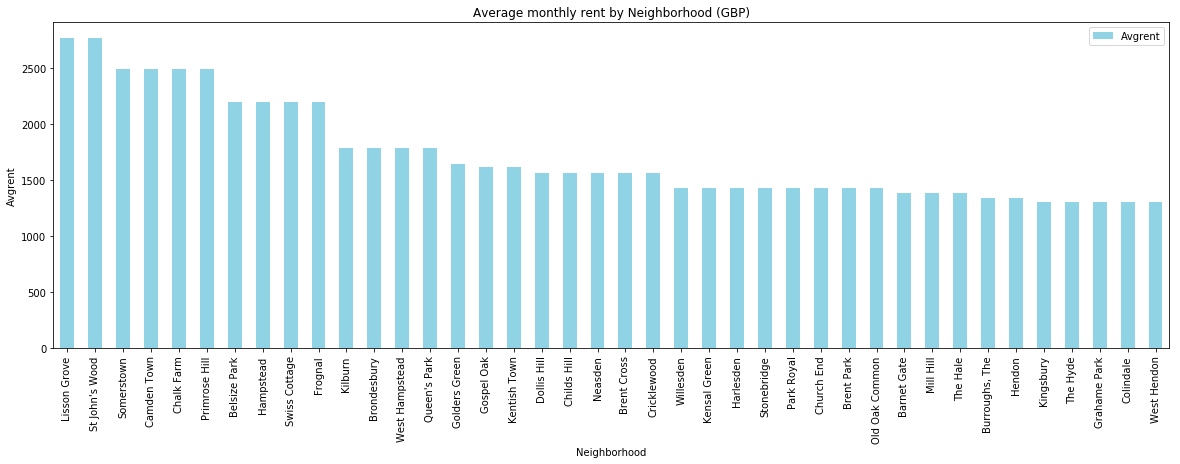

In [556]:
#Here is a bar plot showing the average monthly rent per neighborhood in a descending order.
df_renttable.plot(kind='bar', figsize=(20, 6), color="#90D3E5")

plt.xlabel('Neighborhood')
plt.ylabel('Avgrent')
plt.title('Average monthly rent by Neighborhood (GBP)')

plt.show()

In [ ]:
#How should we pick an interesting neighborhood, since all of them have similar facilities? Let's look at the amount of parks the neighborhoods have, since that is an imortant criteria.

In [527]:
lon_venues[lon_venues['Venue Category'].str.contains("Park")]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
94,Camden Town,51.544545,-0.133901,Camden Square,51.544894,-0.131536,Park
124,Chalk Farm,51.543966,-0.154115,Chalcot Square,51.540933,-0.155676,Park
193,Childs Hill,51.563644,-0.205259,Basing Hill Park,51.567820,-0.207237,Park
195,Childs Hill,51.563644,-0.205259,Millennium Green,51.562815,-0.210926,Park
199,Church End,51.492613,-0.265672,Turnham Green,51.492099,-0.265968,Park
219,Church End,51.492613,-0.265672,Chiswick Park,51.494684,-0.270419,Park
246,Church End,51.492613,-0.265672,Gunnersbury Triangle,51.494288,-0.268504,Park
253,Colindale,51.593099,-0.250297,Colindale Park,51.593882,-0.248508,Park
278,Cricklewood,51.554876,-0.220029,Mapesbury Dell,51.552932,-0.213520,Park
298,Frognal,51.552593,-0.188385,West End Green,51.552081,-0.192486,Park


In [539]:
#It seems like Church End has many parks, and is on the less expensive side of the box plot. Let's examine it more! I want to see if there are many shops close.
#First we need it's latitude and longitude coordinates:
df_all.loc[9,["Latitude","Longitude"]]

Latitude      51.4926
Longitude   -0.265672
Name: 9, dtype: object

In [540]:
latitude=51.4926
longitude=-0.265672
search_query = 'shop'
radius = 1000
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, limit)
results = requests.get(url).json()

In [541]:
venues = results['response']['venues']

dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d16a941735', 'name': 'B...",False,4cc19b54e310224bb702316f,296 Chiswick High Rd,GB,Chiswick,United Kingdom,NaN,369,"[296 Chiswick High Rd, Chiswick, Greater Londo...","[{'label': 'display', 'lat': 51.49245641343177...",51.492456,-0.260340,W4 1PA,Greater London,The Bread Shop,v-1590076698,NaN
1,"[{'id': '4d1cf8421a97d635ce361c31', 'name': 'T...",False,4de28bb7814df7ebdc157743,229C Chiswick High Rd,GB,Chiswick,United Kingdom,NaN,421,"[229C Chiswick High Rd, Chiswick, Greater Lond...","[{'label': 'display', 'lat': 51.49232601978754...",51.492326,-0.259606,W4 2DW,Greater London,The Tanning Shop,v-1590076698,NaN
2,"[{'id': '4bf58dd8d48988d101951735', 'name': 'T...",False,5a9588cb491be7438eaf17ff,318 Chiswick High Rd,GB,London,United Kingdom,NaN,291,"[318 Chiswick High Rd, London, Greater London,...","[{'label': 'display', 'lat': 51.49256560796167...",51.492566,-0.261471,W4 5TA,Greater London,Trinity Hospice Charity Shop,v-1590076698,NaN
3,"[{'id': '4bf58dd8d48988d10c951735', 'name': 'C...",False,4c232f717e85c928f61ebd21,244 Chiswick High Rd,GB,Chiswick,United Kingdom,NaN,457,"[244 Chiswick High Rd, Chiswick, Greater Londo...","[{'label': 'display', 'lat': 51.49249143274106...",51.492491,-0.259067,W4 1PD,Greater London,The Body Shop,v-1590076698,NaN
4,"[{'id': '4bf58dd8d48988d16d941735', 'name': 'C...",False,54a1534c498effe1e03a55c3,114 Chiswick High Rd,GB,Chiswick,United Kingdom,NaN,944,"[114 Chiswick High Rd, Chiswick, Greater Londo...","[{'label': 'display', 'lat': 51.49286041858765...",51.492860,-0.252044,W4 1PU,Greater London,Angie's Little Food Shop,v-1590076698,NaN


In [542]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered.head()

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,postalCode,state,id
0,The Bread Shop,Bakery,296 Chiswick High Rd,GB,Chiswick,United Kingdom,NaN,369,"[296 Chiswick High Rd, Chiswick, Greater Londo...","[{'label': 'display', 'lat': 51.49245641343177...",51.492456,-0.260340,W4 1PA,Greater London,4cc19b54e310224bb702316f
1,The Tanning Shop,Tanning Salon,229C Chiswick High Rd,GB,Chiswick,United Kingdom,NaN,421,"[229C Chiswick High Rd, Chiswick, Greater Lond...","[{'label': 'display', 'lat': 51.49232601978754...",51.492326,-0.259606,W4 2DW,Greater London,4de28bb7814df7ebdc157743
2,Trinity Hospice Charity Shop,Thrift / Vintage Store,318 Chiswick High Rd,GB,London,United Kingdom,NaN,291,"[318 Chiswick High Rd, London, Greater London,...","[{'label': 'display', 'lat': 51.49256560796167...",51.492566,-0.261471,W4 5TA,Greater London,5a9588cb491be7438eaf17ff
3,The Body Shop,Cosmetics Shop,244 Chiswick High Rd,GB,Chiswick,United Kingdom,NaN,457,"[244 Chiswick High Rd, Chiswick, Greater Londo...","[{'label': 'display', 'lat': 51.49249143274106...",51.492491,-0.259067,W4 1PD,Greater London,4c232f717e85c928f61ebd21
4,Angie's Little Food Shop,Café,114 Chiswick High Rd,GB,Chiswick,United Kingdom,NaN,944,"[114 Chiswick High Rd, Chiswick, Greater Londo...","[{'label': 'display', 'lat': 51.49286041858765...",51.492860,-0.252044,W4 1PU,Greater London,54a1534c498effe1e03a55c3


In [543]:
dataframe_filtered.name

0                                        The Bread Shop
1                                      The Tanning Shop
2                          Trinity Hospice Charity Shop
3                                         The Body Shop
4                              Angie's Little Food Shop
5                                   Jimmy's Barber Shop
6     DPD Parcel Shop Location - Snappy Snaps (Chisw...
7                                         The Mock Shop
8                          Trinity Hospice Charity Shop
9                                            Esska Shop
10               DPD Parcel Shop Location - South Beach
11    Mary's Living & Giving Shop for Save The Children
12                                     Mike's Dive Shop
13                                   The Good Wine Shop
14                                              Cowshed
15                                            CHI MOVES
Name: name, dtype: object

In [544]:
#A map showing coffee shops close to Church End
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13)

folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Church End',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

venues_map

In [545]:
#It's looking great! One more important thing is that the neighborhood has a gym close.

latitude=51.4926
longitude=-0.265672
search_query = 'gym'
radius = 1000
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, limit)
results = requests.get(url).json()

venues = results['response']['venues']

dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId
0,"[{'id': '4bf58dd8d48988d175941735', 'name': 'G...",False,4c91cf56238c6dcbcf2ec355,10 Sutton Lane,GB,Hounslow,United Kingdom,481,"[10 Sutton Lane, Hounslow, Greater London, W4 ...","[{'label': 'display', 'lat': 51.48924082435745...",51.489241,-0.270041,W4 4LD,Greater London,West4 Gym,v-1590076764
1,"[{'id': '4bf58dd8d48988d176941735', 'name': 'G...",False,4d25679e38d0236aecb4ebb6,NaN,GB,NaN,United Kingdom,1101,[United Kingdom],"[{'label': 'display', 'lat': 51.49324, 'lng': ...",51.493240,-0.281528,NaN,NaN,The Gym Clinic,v-1590076764
2,[],False,50f6bb56e4b07eb723011827,NaN,GB,NaN,United Kingdom,1091,[United Kingdom],"[{'label': 'display', 'lat': 51.486316, 'lng':...",51.486316,-0.253577,NaN,NaN,IMG Gym,v-1590076764
3,"[{'id': '4bf58dd8d48988d1a7941735', 'name': 'C...",False,4f993c2de4b05c38102c7a18,NaN,GB,NaN,United Kingdom,973,[United Kingdom],"[{'label': 'display', 'lat': 51.49606662416437...",51.496067,-0.252771,NaN,NaN,Arts Ed Library,v-1590076764
4,"[{'id': '4bf58dd8d48988d1a8941735', 'name': 'G...",False,4c9c987b542b224b7ba0e19f,14 Bath Rd.,GB,Chiswick,United Kingdom,966,"[14 Bath Rd., Chiswick, Greater London, W4 1LY...","[{'label': 'display', 'lat': 51.49606341763148...",51.496063,-0.252889,W4 1LY,Greater London,ArtsEd (Arts Educational Schools London),v-1590076764


In [546]:
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

In [547]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=13)

folium.CircleMarker(
    [latitude, longitude],
    radius=10,
    color='red',
    popup='Church End',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

venues_map

In [ ]:
#Church End seems to have everything needed, and I'm happy with it. Therefore it would be a great location to move to!